In [2]:
!pip install table-ocr

     |████████████████████████████████| 33.4 MB 293 kB/s eta 0:00:01


In [2]:

def extract_line_items(image_path):
    image_tables = table_ocr.extract_tables.main([image_path])
    for _, tables in image_tables:
    # iterate all the detected tables
        for table in tables:
            # extract all cells in table and run OCR
            cells = table_ocr.extract_cells.main(table)
            ocr = [
                table_ocr.ocr_image.main(cell, None)
                for cell in cells
                ]
            for c, o in zip(cells[:3], ocr[:3]):
                with open(o) as ocr_file:
                    text = ocr_file.read().strip()
                    print("{}: {}".format(c, text))

                return table_ocr.ocr_to_csv.text_files_to_csv(ocr)

In [1]:
import table_ocr.util
import table_ocr.extract_tables
import table_ocr.extract_cells
import table_ocr.ocr_image
import table_ocr.ocr_to_csv

In [3]:
result = extract_line_items('31.png')

31/cells/000-000.png: Ce 5 Pn rvices


In [4]:
print(result)

Ce 5 Pn rvices,2 PE .
76 Soclal Security No,17 FIret name,ter,Last name,18 Total Wages,,rou,erote,ersoue
498-50-0899,KEITH,F,BRICKEY,23250.0C,F,F,F,F
492-58-480,DARREL,3,SMIT#,6130.0¢,F,F,F,F
493-78-9576,ERRICK,F,ETTER,3631.26,F,F,F,F
489-86-4328,DANN,£,KLIETHERMES,8643 13,F,F,F,F
491-94-509,RANDY,F,TMEYER,34 UU,F,F,F,F
497-880-6308,CURTIS,E,3AX,0227 2,F,F,F,F
496-884-3728,BRIAN,K,4CMILLIAN,7942 94,F,F,F,F
494-688-2893,MATTHEW,3,SEALS,9122.50,F,F,F,F
486-80-6502,GREGORY,E,ENKE,9053 76,F,F,F,F
498-78-1879,JOHN,B,ROCKWELL,15472 00,F,F,F,F
486-66-5548,RANDAL,L,KIRCHNER,2424 39,F,F,F,F
493-19-8902,Noa,F,Kese,4221 00,F,F,F,F
49194-3569,SCOT1,F,TTLE,9112 5,F,F,F,F
500-94-5644,ly,F,Jar,460 00,F,F,F,F
486-74-5396,PA,F,SAMSON,30568.59,F,F,F,F
488-82-9815,GREGORY,,DORGE,24804 69,F,F,F,F
492-82-2409,PATRICK,p,KREMER,19597.5,F,F,F,F
493-17-9304,Calet,F,Werdenhause,6452 ¢,F,F,F,F
49313-1978,KURTIS,F,BRICKEY,9483 0,F,F,F,F
56-70-1640,ERRY,N,ORGAN,9534,F,F,F,F
494-13-9484,SAMUE,F,CHROEDER,7968 !,F,F,

## Applying table enhancement 

In [12]:
import cv2 
import numpy as np
import table_enhancement

import matplotlib.pyplot as plt 

In [10]:
from table_enhancement import get_lines

In [11]:
image = cv2.imread('31.png',0)
enhanced_image = get_lines(image)

Number of horizontal lines removed -  36
Number of vertical lines removed -  19
(30, 4)
(17, 4)


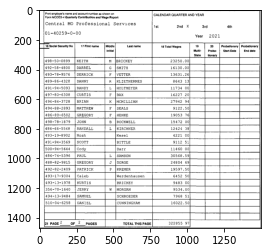

In [14]:
plt.imshow(image,cmap="gray")

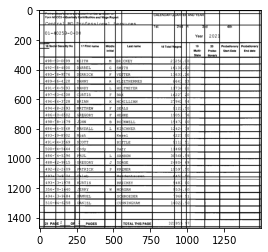

In [15]:
plt.imshow(enhanced_image, cmap="gray")

In [16]:
cv2.imwrite("31_new.png",enhanced_image)

True

## Running table ocr on enhanced image 

In [17]:
result2 = extract_line_items('31_new.png')

31_new/cells/000-000.png: 2


In [18]:
print(result2)

2,F,F,F,F,F,F,F,F,F,F,F,F
7,0E5-4,,rr,9 Rep,1,29,ALENDAR Q,PAR,AND YEAR,F,F,F
01-4,025,P04,D,F,F,Tst,2n,Year,2021,4,F
16 Socl{,1Secu,ty No,17 FIret name,ter,Last name,18 Total W,pges,n,5,erote,ersoue
498-:,0-0,99,TH,F,ZKEY,€,25,,F,F,F
492-:,6-4,0,ARREL,3,T,€,3,,F,F,F
493-,8-9:,6,RRICK,F,E,TER,F,63,6,F,F,F
489-,6-4,28,1NN,8,LETHERMES,F,64,3,F,F,F
491-,4-£,9,ANDY,F,TMEYER,F,3,,F,F,F
497-,3-6,08,RTIS,E,K,€,2,F,F,F,F
4960,4-3,28,IAN,K,AN,“1,94,E,F,F,F
494-,8-,93,ATTHEW,3,L5,<,2,~,F,F,F
486-4,0-64,02,REGORY,E,KE,F,0<,6,F,F,F
498-,8-,9,PHN,B,EKWELL,18,47,,F,F,F
486-4,6-5,48,1NDAL,L,RCHNER,<,4,o,F,F,F
493-,2-6,2,a,F,e,F,22,“,F,F,F
491,4-3,69,5T,F,CTLE,q,F,F,F,F,F
500-,4-54,44,y,F,exr,F,46,1,F,F,F
486-,4-5,96,4,F,4S0N,3C,564,7,F,F,F
488-,2-9,15,REGORY,,RGE,Z,80,2,F,F,F
492-,4724,9,ATRICE,p,EMER,-,9,F,F,F,F
Q3,3a,F,F,F,P1 2,F,S,F,F,F,F
F,F,F,F,F,F,F
493-,3,0,RTIS,F,CKEY,F,48,F,F,F,F
56-,0~,4,{RY,N,GAN,<,53,F,F,F,F
494-,-9,84,BMUE,F,HROEDER,F,964,F,F,F,F
510-,4-6,58,BNIE,F,ININGHAL,14,024,,F,F,F

## With poor line quality 

In [20]:
result3 = extract_line_items('111.png')

111/cells/000-000.png: an


In [21]:
print(result3)

an,
,2,e,
teas,,.,2,eoen,F,F,F
0s,jessaess,S,e,31.66,F,F,F
,,F,root,est1s
F,eee,F,2,—,F,,F
F,F,F,F
F,F,F,F,F
F,F,—_—,omam,———,F,F,F
F,F
F
F,F,F,F,F,F,F,F
F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,,F,F,F,F,F
F,F
F,F,F,F,F
F,F,F,F
FOTAL 1HIS PAGF



In [22]:
image = cv2.imread('111.png',0)
enhanced_image = get_lines(image)

cv2.imwrite("111_new.png",enhanced_image)

Number of horizontal lines removed -  28
Number of vertical lines removed -  7
(29, 4)
(10, 4)


True

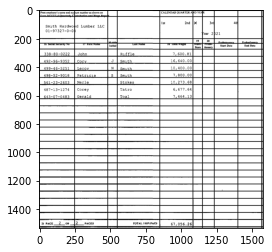

In [26]:
plt.imshow(enhanced_image,cmap="gray")

In [23]:
result4 = extract_line_items('111_new.png')

111_new/cells/000-000.png: Print ¢mployer’s name and ace


In [24]:
print(result4)

Print ¢mployer’s name and ace,punt number as shown on,1,F,CALENDAR QUARTER A,ND YEA,R,F,F
P,p Lumber LL(,F,F,1st 2nd,X,),121 |,F
F,F,M1,F,F,19,20,2robat10nary,2ahatlonary
I6 SocarSecuriy No,T7 FIrst Vame,Initla,Last Name,T5 TOVAT 5s,State,tlonary,Start Date,End Date
338-80-0222,John,F,R1if£fle,",600.8",F,F,F,F
492-96-9352,Cory,v,Smath,"6,640.00",F,F,F,F
499-46-525,Lexoy,N,Smtk,"10,400.00",F,F,F,F
498-52-9018,Patricia,$,Smath,"7,800.00",F,F,F,F
561-23-2603,Merle,F,Stokes,"10,273.68",F,F,F,F
s,",",F,—r,1s,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,,F,F,F,F,F
F,F,F,—,F,F,F,F,F
F,—,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
F,F,F,F,F,F,F,F,F
—————=,F,F,F,F,F,F,F,F
21 PAGE 2 ’ Or,2 races,F,FOTAL 1HIS PAGF,"67,056.26",F,F,F,F

